## Why: In the United States, approximately 40% of people will be diagnosed with cancer at some point in their lives. In my life I have lost my godfather and stepmother to cancer over  the last ten years. My motivation is to explore if there are factors that are associated with higher risks for cancer. 

# Why Lung Cancer?


# Lung cancer remains the most commonly diagnosed cancer in the United States. Males are generally at a higher lifetime risk of developing lung cancer. 

In [1]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

from collections import Counter


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('survey lung cancer.csv')

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

33

In [9]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## What do the Cancer rates look like for this dataset?

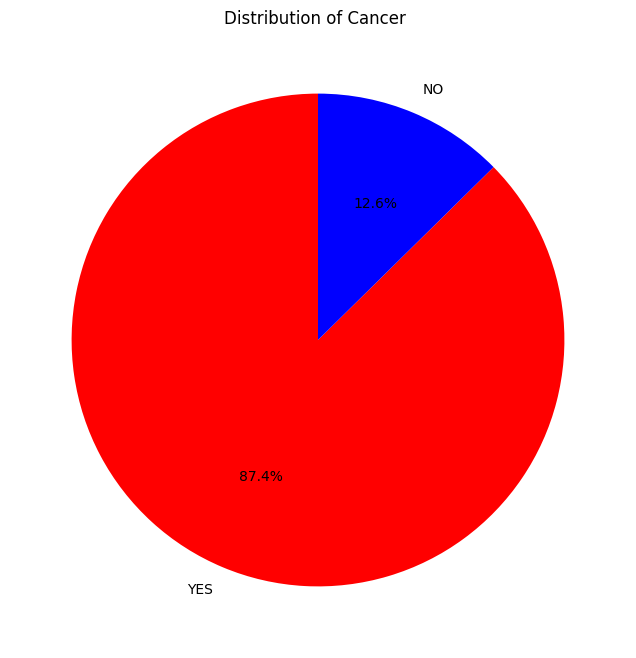

In [71]:
# Count the occurrences of each level
level_counts = df['LUNG_CANCER'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# Adding a title
plt.title('Distribution of Cancer ')
plt.show()

In [11]:
df['AGE'].value_counts()

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [12]:
df['AGE'].mean()

62.67313915857605

In [70]:
mean_ = np.mean(df['AGE'])
std_ = np.std(df['AGE'])
median_ = np.median(df['AGE'])

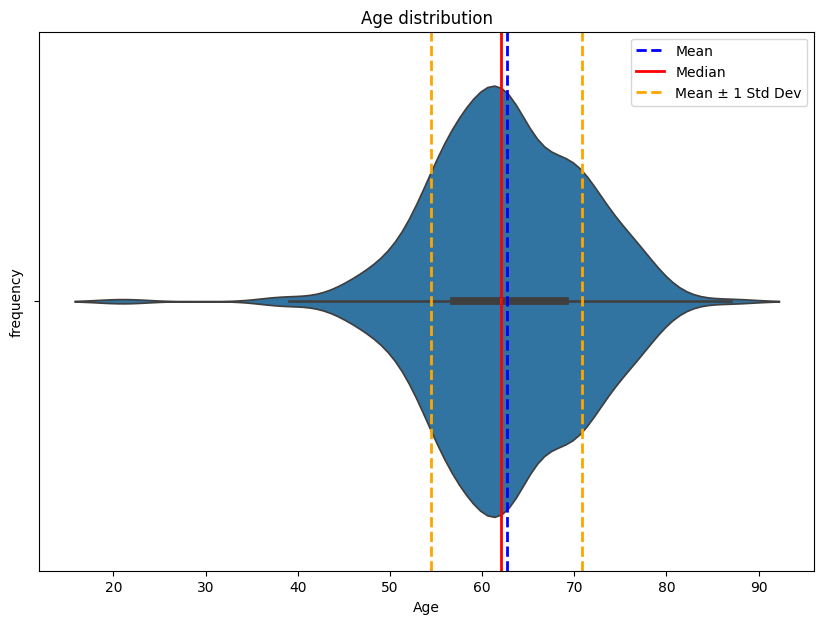

In [14]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='AGE', data=df, ax=ax)

#Lable axis

ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_title('Age distribution')

ax.axvline(mean_, color='blue', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median_, color='red', linestyle='solid', linewidth=2, label='Median')
ax.axvline(mean_ + std_, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
ax.axvline(mean_ - std_, color='orange', linestyle='dashed', linewidth=2)

ax.legend()
plt.show()

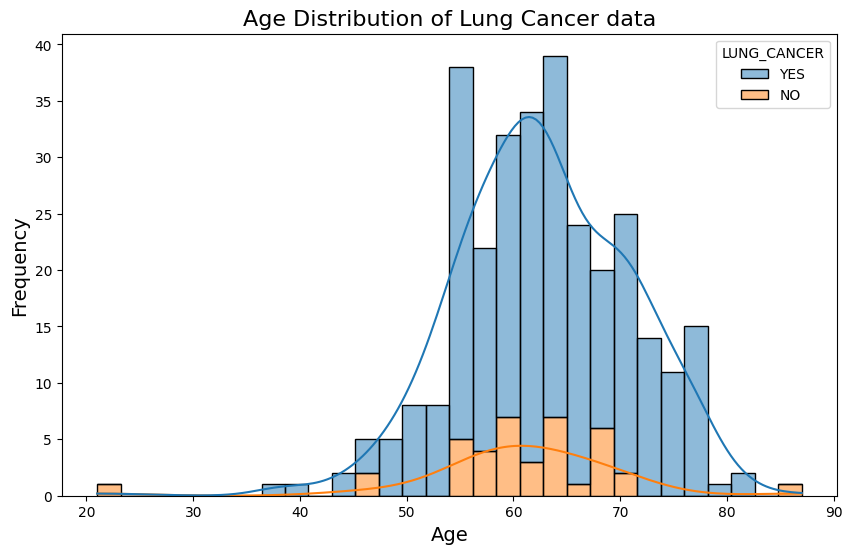

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='AGE', hue='LUNG_CANCER', multiple='stack', bins=30, kde=True)

plt.title('Age Distribution of Lung Cancer data', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Observation: This data consits of mostly people ages 45-75.

## Question: Does Gender play a role in Cancer?

In [17]:
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

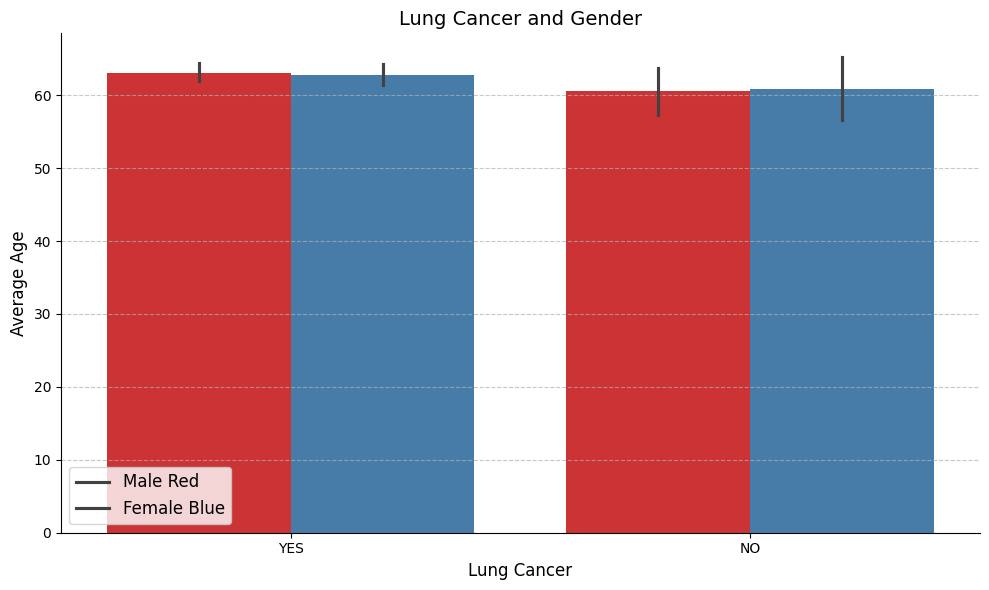

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure size
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=df,
            x='LUNG_CANCER',
            y='AGE',
            hue='GENDER',
            palette='Set1')

# labels and title
plt.xlabel('Lung Cancer', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Lung Cancer and Gender', fontsize=14)

# Remove top and right spines
sns.despine()

# legend
plt.legend(labels=['Male Red','Female Blue'],fontsize=12)

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

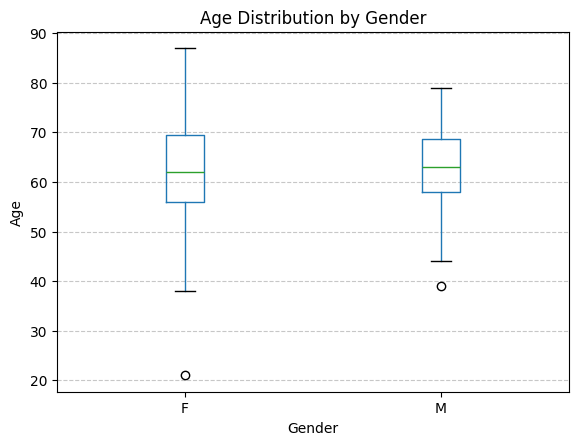

In [19]:
# Plotting boxplot
plt.figure(figsize=(10, 8))
df.boxplot(column='AGE', by='GENDER', grid=False)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('Gender')
plt.ylabel('Age')
# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
grouped = df.groupby('LUNG_CANCER')['AGE']

In [21]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
LUNG_CANCER,,,,,,,,
NO,39.0,60.743590,9.629226,21.0,57.0,61.0,65.5,87.0
YES,270.0,62.951852,7.966560,38.0,58.0,62.5,69.0,81.0


<Figure size 800x600 with 0 Axes>

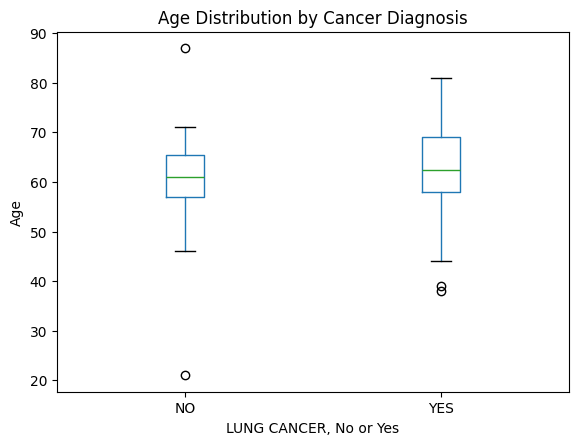

In [24]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='AGE', by='LUNG_CANCER', grid=False)

# Adding labels and title
plt.title('Age Distribution by Cancer Diagnosis')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('LUNG CANCER, No or Yes')
plt.ylabel('Age')
plt.show()

## Can I use a correlation matrix to gain insight on how the features in the dataset interact?

## Preprocessing

In [25]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [26]:
df_encoded = df.copy()

In [27]:
df_encoded['LUNG_CANCER'].head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [28]:
#Binary features mapping

binary_column = ['LUNG_CANCER']


df_encoded[binary_column] = df_encoded[binary_column].apply(lambda x : x.map({'YES':1, 'NO':0}))

In [29]:
df_encoded['GENDER'].head()

0    M
1    M
2    F
3    M
4    F
Name: GENDER, dtype: object

In [30]:
#Gender column

Gender_column = ['GENDER']

df_encoded[Gender_column] = df_encoded[Gender_column].apply(lambda x : x.map({'M':1, 'F':0}))

## Scaling features

In [31]:
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [32]:
from sklearn.preprocessing import StandardScaler

continuous_numeric_column = ['AGE']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[continuous_numeric_column] = scaler.fit_transform(df_encoded[continuous_numeric_column])

In [33]:
#Calculate the Correlation Matrix
correlation_matrix = df_encoded.corr()

In [34]:
print(correlation_matrix)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133

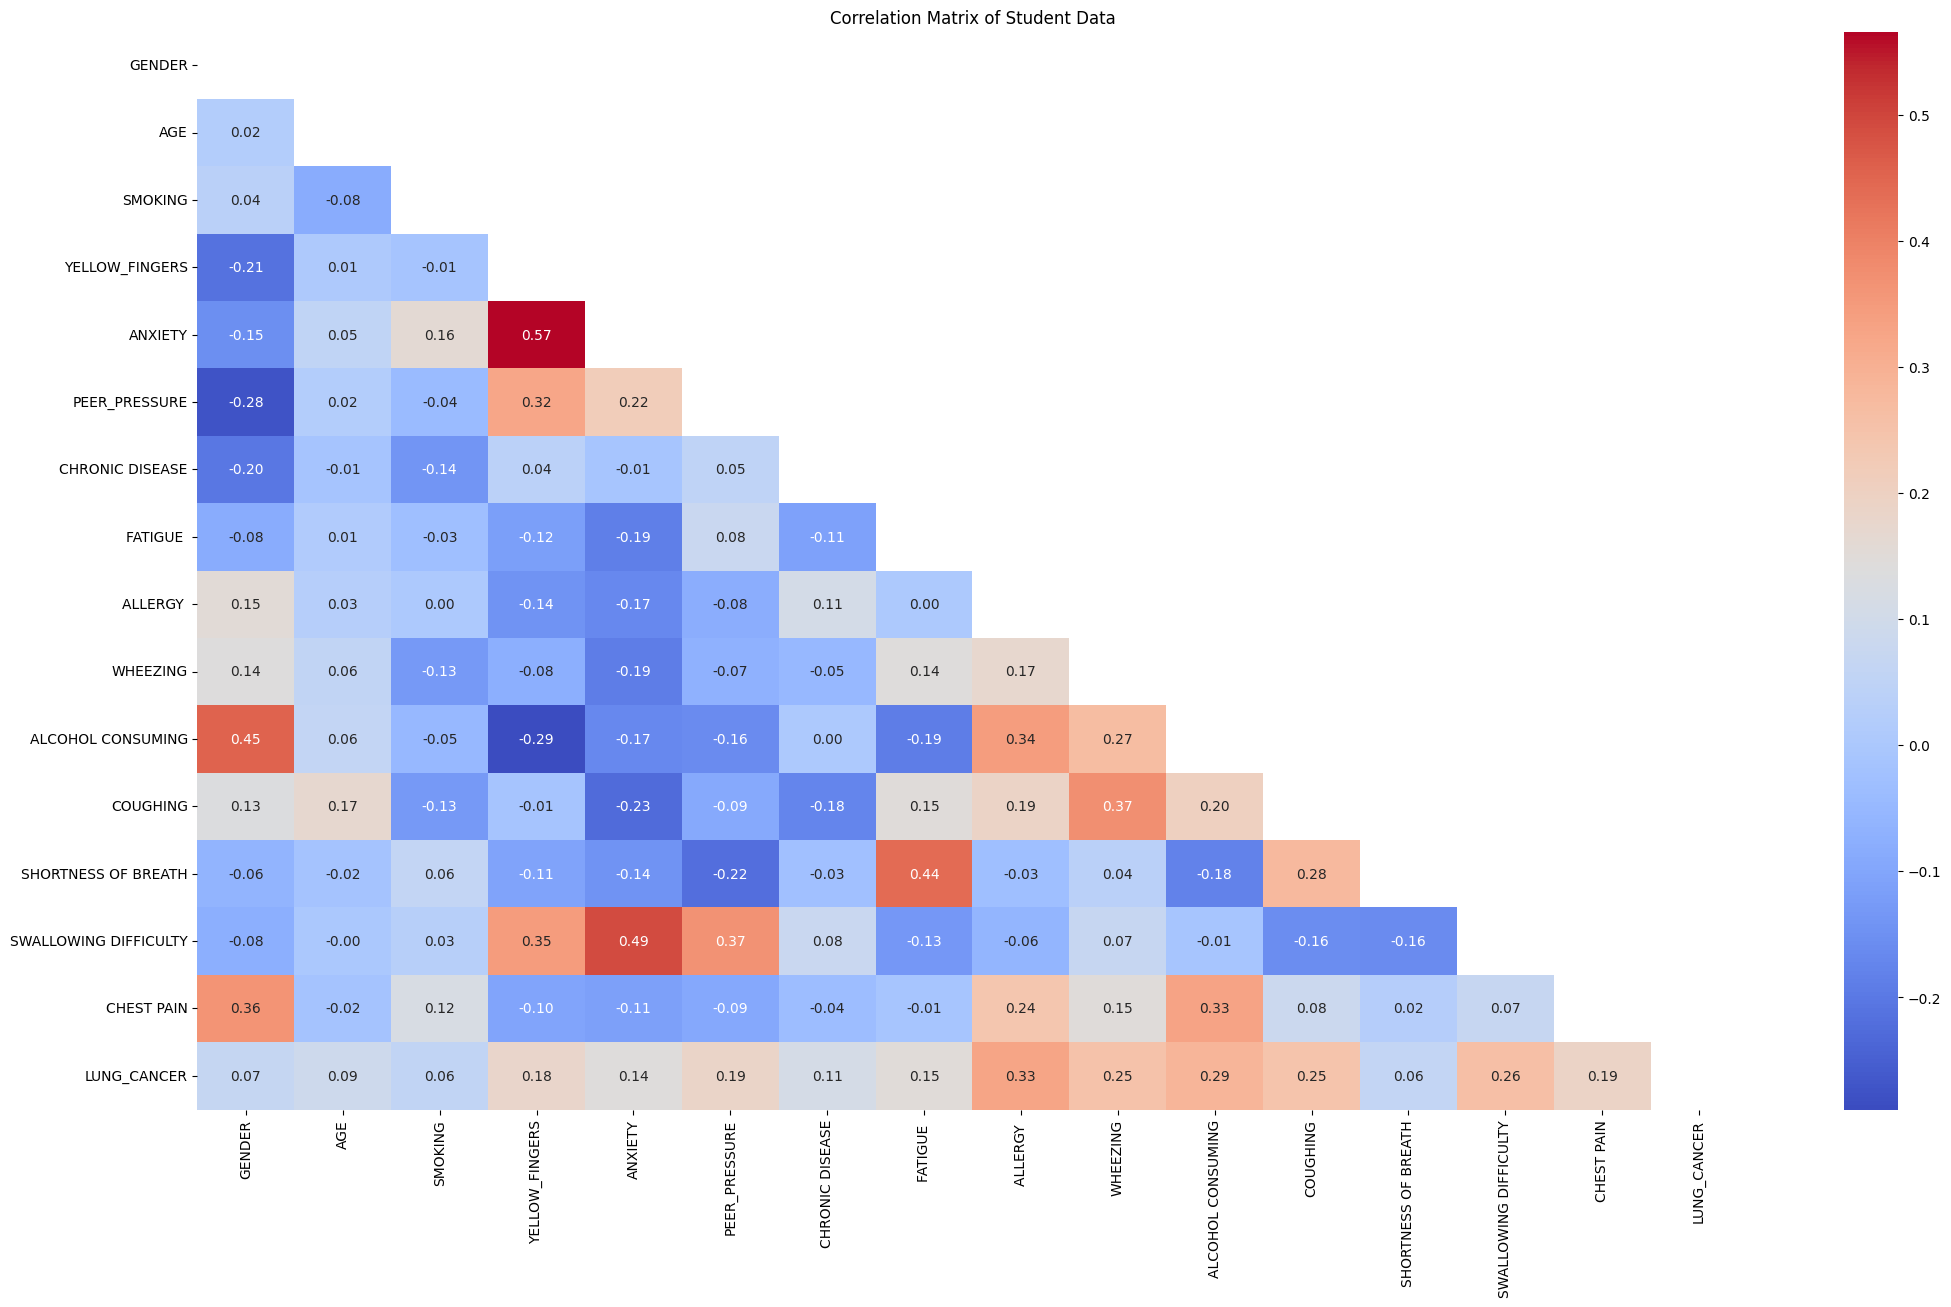

In [35]:
#Plot the Correlation Matrix
plt.figure(figsize=(25, 14))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Student Data')

plt.show()

## Observations: Correlation between Allergy, Alcohol consumption, coughing, yellow fingers and chest pain. 

## Can I build a Machine Learning Model to help predict if a person between age 45-75 has cancer based on these features?

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['LUNG_CANCER'], axis=1) 

y = df_encoded['LUNG_CANCER']
 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

## Linear Regression or Classification? 
 

## Modeling

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Initializing the model 

lr = LinearRegression()

#Fitting the model
lr.fit(X_train, y_train)

#Making predictions on test data
y_pred = lr.predict(X_test)

#Check model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Print results 

print('Mean Squared Error', mse)
print('R2 score', r2)

Mean Squared Error 0.061330683384069364
R2 score 0.3336859326630748


## Linear Regression Model 2 Ridge

In [38]:
from sklearn.linear_model import Ridge 

#Initialize model
ridge = Ridge(alpha=1.0)

#Fit model
ridge.fit(X_train,y_train)

#Predict
y_pred_ridge = ridge.predict(X_test)

#Check scores
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Mean Squared Error', mse_ridge)
print('R^2 Ridge Score', r2_ridge)

Ridge Mean Squared Error 0.060956482267788256
R^2 Ridge Score 0.33775136050495747


## Random Forest Reggression Model

In [39]:
from sklearn.ensemble import RandomForestRegressor


#initialize the random forest regressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10,random_state=22)


#Train model
rf.fit(X_train, y_train)

#Make prediction
y_pred_rf = rf.predict(X_test)

#Check model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Rf Mean Squared Error', mse_rf)
print('Rf R2 Score', r2_rf)

Rf Mean Squared Error 0.056628285533396654
Rf R2 Score 0.3847741264550262


## Hyperparameter tunning

In [40]:
#Random Search 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform 

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0, 1)  # Fraction of features to consider at each split
}


# Instantiate the random search model
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3, 
    n_jobs=-1, 
    verbose=2, 
    scoring='neg_mean_squared_error',
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

# Feature importance
feature_importance = best_model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1} importance: {importance}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.5s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.5s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.5s
[CV] END max_depth=33, max_features=0.6508884729488529, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   1.1s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.1s
[CV] END max_depth=33, max_features=0.6508884729488529, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   1.1s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.

## Visualizing Feature Importance 

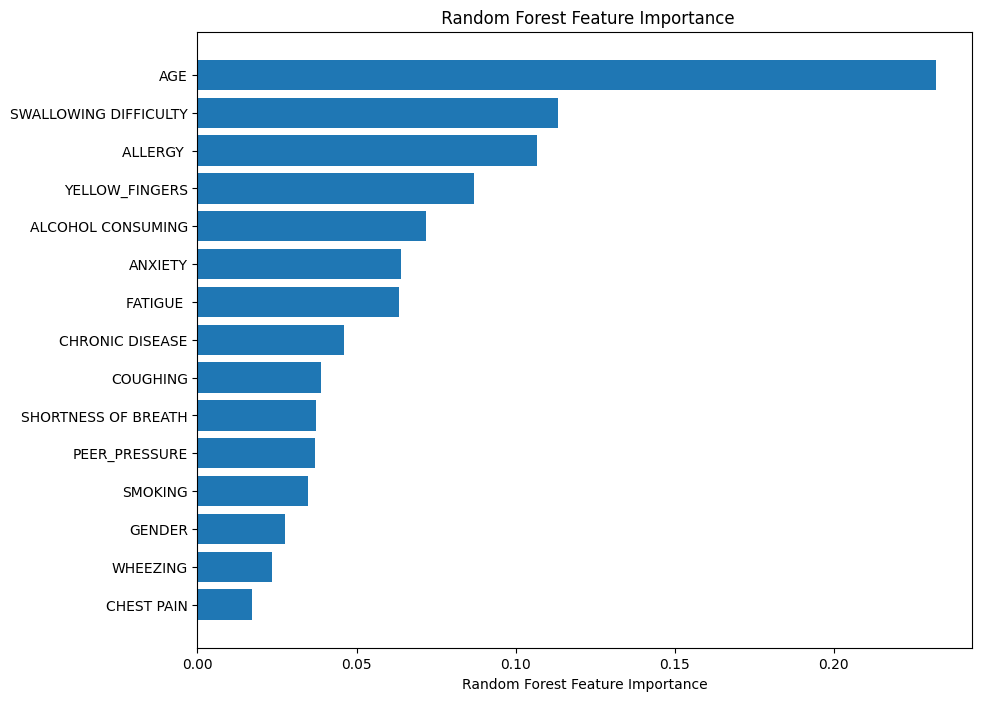

In [41]:
# Extract and plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx], fontsize=10)
plt.xlabel("Random Forest Feature Importance")

plt.title(' Random Forest Feature Importance')
plt.show()

## Classification Model: Logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=22)


#fit the model
logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

In [44]:
#Check model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9743589743589743
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.97      1.00      0.99        70

    accuracy                           0.97        78
   macro avg       0.99      0.88      0.92        78
weighted avg       0.98      0.97      0.97        78



In [45]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 6  2]
 [ 0 70]]


## Visualizing Feature Importance of Classification Model 

                       Coefficient  Importance
AGE                       0.077767    0.077767
GENDER                    0.143765    0.143765
CHEST PAIN                0.150918    0.150918
SHORTNESS OF BREATH       0.153013    0.153013
WHEEZING                  0.222485    0.222485
SMOKING                   0.224161    0.224161
YELLOW_FINGERS            0.226205    0.226205
FATIGUE                   0.252747    0.252747
ANXIETY                   0.273466    0.273466
CHRONIC DISEASE           0.277391    0.277391
SWALLOWING DIFFICULTY     0.287767    0.287767
COUGHING                  0.323582    0.323582
PEER_PRESSURE             0.339218    0.339218
ALLERGY                   0.495600    0.495600
ALCOHOL CONSUMING         0.536331    0.536331


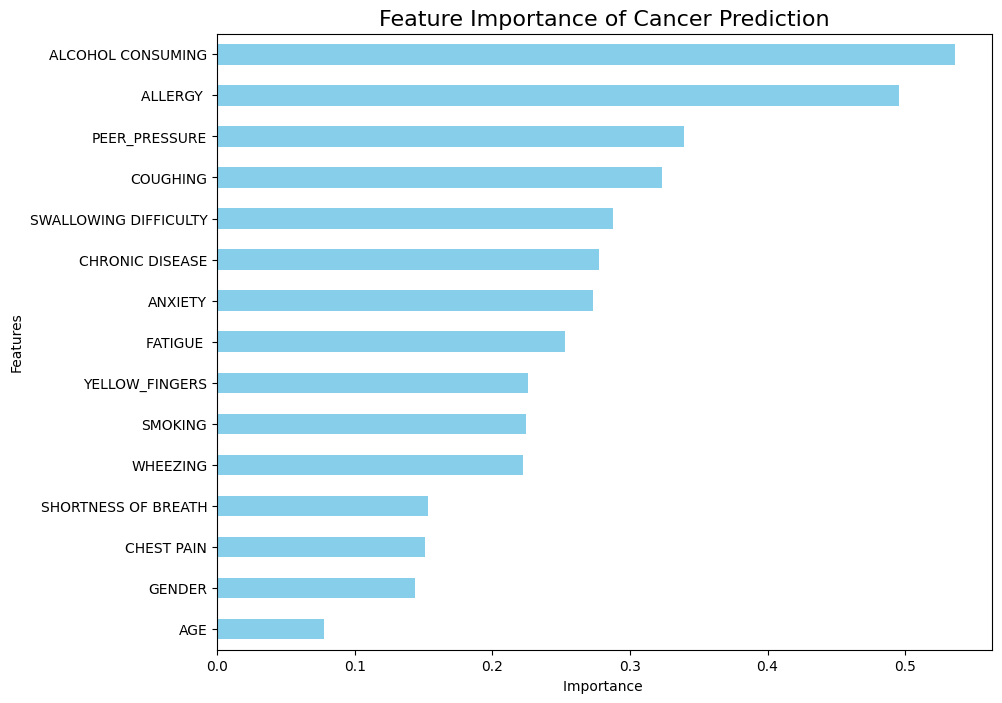

In [69]:


feature_names = X_train.columns

# Get the coefficients of the model (for binary classification, there is only one set of coefficients)
coefficients = logreg_model.coef_.flatten()

# Creating a DataFrame for better visualization
coeff_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# For better readability, you can take the absolute value of the coefficients
coeff_df['Importance'] = coeff_df['Coefficient'].abs()

# Sort by ascending
coeff_df = coeff_df.sort_values(by='Importance', ascending=True)

# Print or visualize the DataFrame
print(coeff_df)

# Plot the feature importances (absolute coefficients)
plt.figure(figsize=(10, 8))
coeff_df['Importance'].plot(kind='barh', color='skyblue')
plt.title('Feature Importance of Cancer Prediction', fontsize=16)
plt.xlabel('Importance ')
plt.ylabel('Features')
plt.show()


## Check if model is overfitting

In [47]:
# Check training accuracy
y_train_pred = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


In [48]:
# Check training accuracy
y_train = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already know the test accuracy
print(f"Test Accuracy: {accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.9743589743589743


## Model is overfitting!

In [49]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(multi_class='multinomial', C=.1, solver='lbfgs', random_state=22)


#fit the model
logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [50]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.9004625346901017


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed i

## Hyperparameter tunning on Log Reg model

In [51]:
# Hyperparameter grid
param_distributions = {
    'C': uniform(0.01, 100),  # C values between 0.01 and 100
    'penalty': ['l2'],  # Only L2 regularization since 'lbfgs' solver does not support L1
    'solver': ['lbfgs'],  # Solver choice
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [52]:
# Initialize the RandomizedSearchCV with Logistic Regression
random_search = RandomizedSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=22),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,  # Ensure reproducibility
    n_jobs=-1  # Use all available cores
)

In [53]:
# Fit Randomized Search on training data

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed i

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=22),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x135c7dca0>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=22, scoring='accuracy', verbose=1)

In [54]:
#Print best parameters

print('Best Parameters', random_search.best_params_)

#Print best cross-val score

print('Best Cross-Validation Score:', random_search.best_score_)

Best Parameters {'C': 85.92819985213441, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9956521739130434


In [55]:
# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9871794871794872
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.99      1.00      0.99        70

    accuracy                           0.99        78
   macro avg       0.99      0.94      0.96        78
weighted avg       0.99      0.99      0.99        78

Confusion Matrix:
[[ 7  1]
 [ 0 70]]


In [58]:
#Model with best params 

# Best Parameters {'C': 85.92819985213441, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

#Best Params model 
Best_logreg_model = LogisticRegression( C=85.92819985213441, max_iter=100, penalty='l2',solver='lbfgs', random_state=22)


#fit the model
Best_logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

In [59]:
# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(Best_logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.9956521739130434


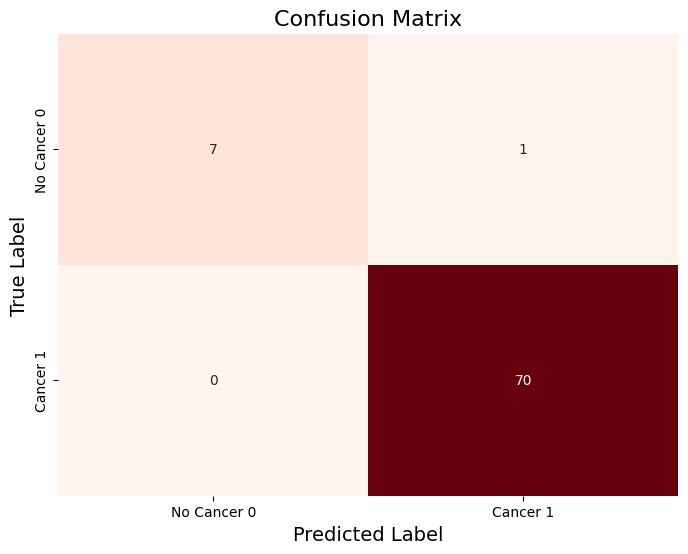

In [63]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

class_names = ['No Cancer 0', 'Cancer 1']

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the plot
plt.show()

In [60]:
# Evaluate the best model from RandomizedSearchCV on the test set
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(X_test)

# Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Test Accuracy: 0.9871794871794872
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.99      1.00      0.99        70

    accuracy                           0.99        78
   macro avg       0.99      0.94      0.96        78
weighted avg       0.99      0.99      0.99        78

Confusion Matrix:
[[ 7  1]
 [ 0 70]]


# Final reflection on Results:

Test accuracy of .98.7 is very high which means that the model correctlly classified the majority of patients. The confusion matrix shows that the model correctly predicted every instance of Cancer from the data set and only missclassified 1 instance as having cancer incorrectly. 

Given the simplicity of this model it offers a cheap way of helping to screen older people based on the features of this dataset. These features could be used during screening and the model can be used as a quick way to evaluate if an elderly person might have cancer and not know it. 



# Next steps: 

- Dealing with imbalanced dataset. My dataset is imbalanced. There are far more instances of patients with cancer which means my model is biased since most of the data that it learned from was from patients who did have cancer. 87% of the data was from patients with cancer. Next steps will include applying Class Weighting method to give more importance to the minority of my training data which was patients who did not have cancer. 